In [ ]:
# How do foreign direct investment, exports, imports, and domestic savings (as a % of GDP) influence a country’s GDP (in current US dollars)?


In [ ]:
#pip install pandas numpy scikit-learn
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# STEP 1: Connect to your SQLite database
db_path = r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db'
conn = sqlite3.connect(db_path)

# STEP 2: SQL Query to select necessary indicators
query = """
SELECT
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]" AS FDI,
    "Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]" AS Exports,
    "Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]" AS Imports,
    "Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]" AS Savings,
    "GDP (current US$) [NY.GDP.MKTP.CD]" AS GDP_USD
FROM Economic_Indicators
WHERE 
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]" IS NOT NULL AND
    "Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]" IS NOT NULL AND
    "Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]" IS NOT NULL AND
    "Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]" IS NOT NULL AND
    "GDP (current US$) [NY.GDP.MKTP.CD]" IS NOT NULL
LIMIT 500;
"""

# STEP 3: Load and clean data
df = pd.read_sql_query(query, conn)
df.replace('..', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.astype(float)

# STEP 4: Define predictors and target (log-transform GDP)
X = df[['FDI', 'Exports', 'Imports', 'Savings']]
y_log = np.log(df['GDP_USD'])  # Log-transform

# STEP 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# STEP 6: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 7: Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# STEP 8: Print results
print("R² Score (Log-GDP):", round(r2, 4))
print("MSE (Log-GDP):", round(mse, 4))
print("\nCoefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.4f}")
print("Intercept:", round(model.intercept_, 4))


R² Score (Log-GDP): 0.3822
MSE (Log-GDP): 2.8575

Coefficients:
FDI: -0.0027
Exports: 0.0381
Imports: -0.0557
Savings: 0.0199
Intercept: 25.5412


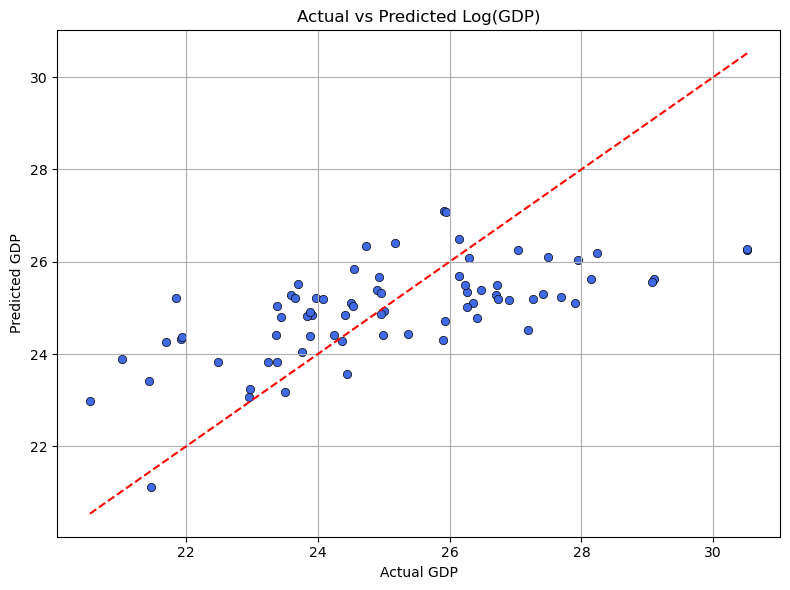

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Actual vs Predicted (Log GDP)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs Predicted Log(GDP)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_12236\732136753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


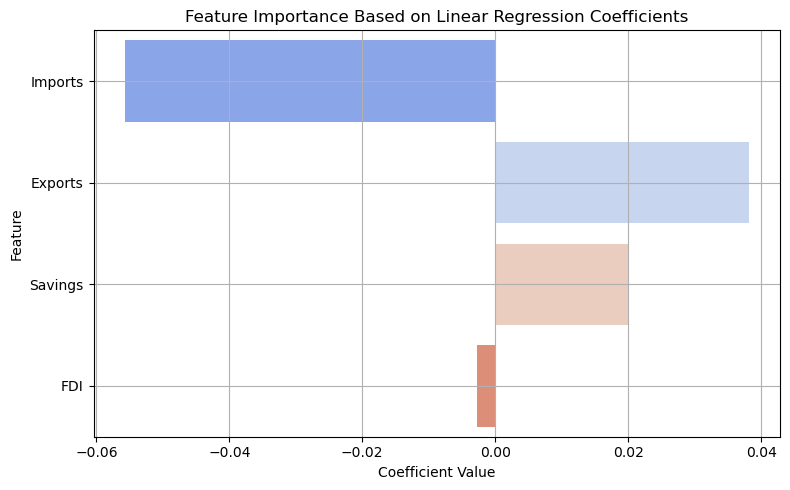

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance Based on Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Imports have the strongest (negative) impact on log-GDP in the model.

# Exports and Savings are positively associated with GDP.

# FDI seems less significant in this dataset or model context.